<a href="https://colab.research.google.com/github/Solyemin/OCR_Divyanshu_Vishal/blob/main/Easy_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install easyocr

In [ ]:
import cv2
import numpy as np
import pandas as pd
import easyocr
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
im_path="/content/drive/My Drive/t2.jpg"
img=cv2.imread(im_path)

In [ ]:
cv2_imshow(img)

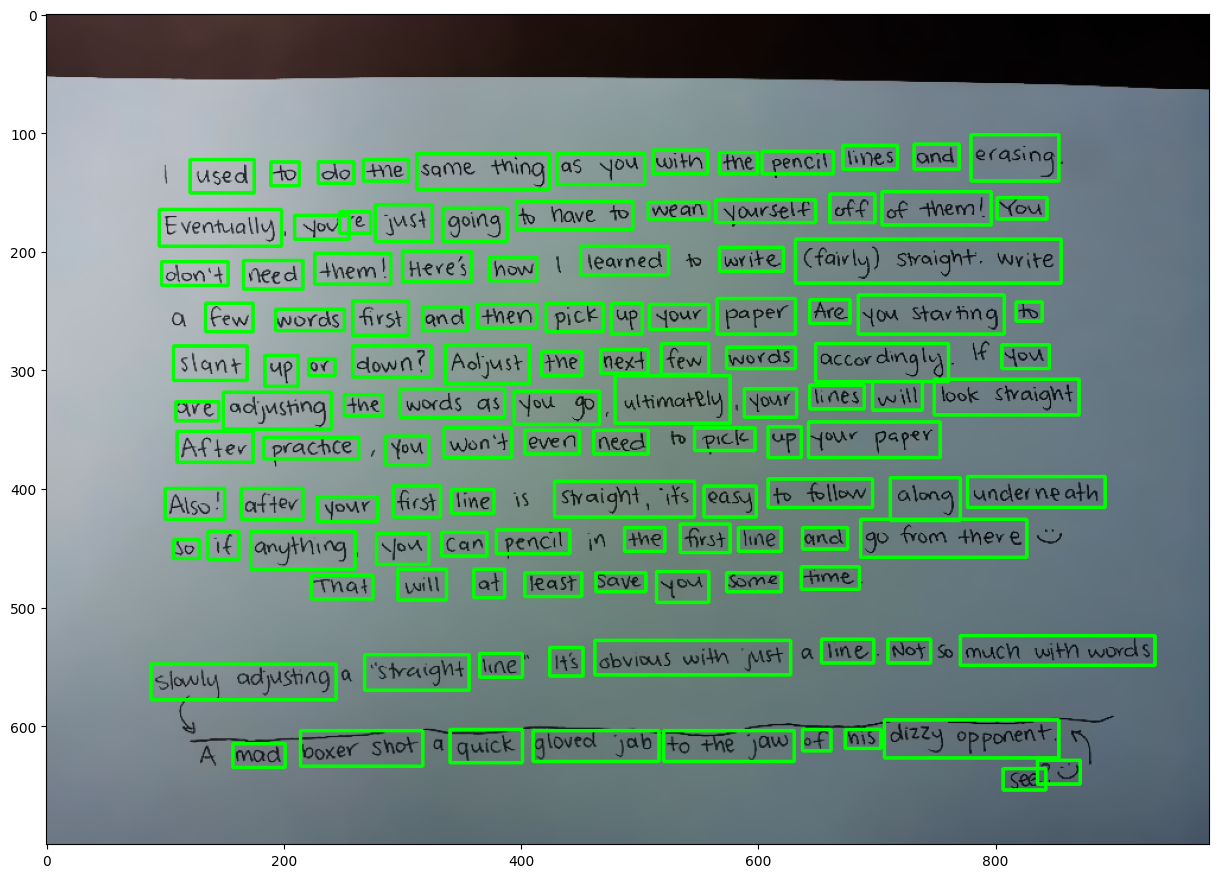

,0,1,2
0,"[[121, 123], [175, 123], [175, 151], [121, 151]]",used,0.698143
1,"[[189, 125], [213, 125], [213, 145], [189, 145]]",t,0.666667
2,"[[229, 125], [259, 125], [259, 143], [229, 143]]",do,0.999618
3,"[[267, 123], [305, 123], [305, 141], [267, 141]]",te,0.294509
4,"[[312, 118], [424, 118], [424, 148], [312, 148]]",same thing,0.403916
...,...,...,...
115,"[[546.2562854188427, 349.5587995863798], [594....",Pick,0.995795
116,"[[183.17086771745093, 357.6221280326862], [261...",practce,0.803507
117,"[[228.41000317999047, 407.45600508798475], [27...",Your,0.838007
118,"[[379.3358994113243, 435.5038491169865], [439....",Pencil,0.971201


In [ ]:
reader=easyocr.Reader(['en'])
bilateral_filter = cv2.bilateralFilter(src=img, d=21, sigmaColor=75, sigmaSpace=75)
result=reader.readtext(img)
for (bbox,text,conf) in result:
  (tl,tr,br,bl)=bbox
  tl=(int(tl[0]),int(tl[1]))
  tr=(int(tr[0]),int(tr[1]))
  br=(int(br[0]),int(br[1]))
  bl=(int(bl[0]),int(bl[1]))
  img = cv2.rectangle(bilateral_filter,tl,br,(0,255,0),2)
  cv2.putText(bilateral_filter,text,(tl[0],tl[1]-10),
              cv2.FONT_HERSHEY_SIMPLEX,0.8,(0,0,255),2)
plt.figure(figsize=(15,15))
plt.imshow(img)
plt.show()
pd.DataFrame(result)